## Importing cleaned csv file
 The file has:
                  -> removed username starting from @ (eg: @ram)
                  -> removed links (https links)
                  -> removed emojis
                  -> removed newline character (\n)

In [2]:
import os
import glob
import pandas as pd
import numpy as np
from gensim.models import TfidfModel

df = pd.read_csv('../cleaning/5.removed_newline.csv')
# columns = df.columns.tolist()
df.head()

,Unnamed: 0,text
0,0,नेकपा एमाले निकै शक्तिशाली देखियो। तराजुमा उ ए...
1,1,विचारको हिसाबले म नेपाली काङ्ग्रेस हुनुपर्ने ह...
2,2,म पवित्र छू भोट हालेको छैन घामे हरुले नै हाले...
3,3,वडासदस्यका उम्मेदवारको मृत्युपछि श्रीमतीले दिइ...
4,4,"एमाले कुहिएको फर्सी हो, छोएपनि रोग लाग्छ : माध..."


In [3]:
def remove_punctuation(text):
    punc = '''!()-[]{};:'"\,।<>./|?@#$%^&*_~'''
    for str in text:
        if str in punc:
            text = text.replace(str, "")

    return text

# Apply the function to remove punctuations from the 'Sentences' column
df['text'] = df['text'].apply(remove_punctuation)

# if not os.path.exists('1.punctuation_removed.csv'):
#     df['text'].to_csv('1.punctuation_removed.csv', index=False)

print(df['text'][0])

नेकपा एमाले निकै शक्तिशाली देखियो तराजुमा उ एक्लै एकातिर पाँच दल अर्को तिर एक्लै हुँदा पनि झन् झन् लोकपृय झन् झन् भारी हुदैछ एमाले


In [4]:
def remove_stopwords(sentence):
    words = sentence.split()
    filtered_sentence = [word for word in words if word.lower() not in nepali_stopwords]
    return ' '.join(filtered_sentence)

def remove_numbers(sentence):
    words = sentence.split()
    filtered_sentence = [word for word in words if word.lower() not in numbers]
    return ' '.join(filtered_sentence)

with open('../nepali_stopwords.txt','r') as file:
    lines = file.readlines()

with open('../numbers.txt','r') as file:
    lines2 = file.readlines()
    
nepali_stopwords = [lines.strip() for lines in lines]
numbers = [l.strip() for l in lines2]
# print(nepali_stopwords)
# new_df = df.copy()
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(remove_numbers)
# if not os.path.exists('2.removed_stopwords.csv'):    
#     df['text'].to_csv('2.removed_stopwords.csv', index=False)
df['text']

0        नेकपा एमाले निकै शक्तिशाली तराजुमा उ एक्लै एका...
1        विचारको हिसाबले नेपाली काङ्ग्रेस हुनुपर्ने आतं...
2                  पवित्र भोट हालेको घामे हरुले हालेछन भोट
3        वडासदस्यका उम्मेदवारको मृत्युपछि श्रीमतीले दिइ...
4        एमाले कुहिएको फर्सी छोएपनि रोग लाग्छ माधव नेपा...
                               ...                        
66673    पत्रकार नेताका प्रचण्ड फरमान गठबन्धनका उम्मेदव...
66674    सुशासन समृद्धि समाजवादको आधार रुपन्देहीको सिद्...
66675                                    मेयर भोट कोल्यापस
66676    MCC पक्षधर प्रतिगामी यथास्थिती बादलाई परास्त ग...
66677    स्थानीय तह निर्वाचन नजिकिँदै गर्दा चुनाव आचारस...
Name: text, Length: 66678, dtype: object

In [5]:
# !pip install pystemmer
import Stemmer
stemmer = Stemmer.Stemmer('nepali')
# stemmer.stemWords(nepali_list)
print(df['text'][1])
df['text'] = df['text'].apply(lambda x: stemmer.stemWord(x))
print(df['text'][1])

विचारको हिसाबले नेपाली काङ्ग्रेस हुनुपर्ने आतंककारी मर्या सिनो माओवादीलाई काॅध थाप्ने काङ्ग्रेसलाई कदापि भोट हाल्न सकिन्न
विचारको हिसाबले नेपाली काङ्ग्रेस हुनुपर्ने आतंककारी मर्या सिनो माओवादीलाई काॅध थाप्ने काङ्ग्रेसलाई कदापि भोट हाल्न सकिन्न


In [6]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

words_sent = [x.split() for x in df['text']]
bigram = Phrases(words_sent, min_count=5, threshold=100)
bigram_phraser = Phraser(bigram)
bigram_bow = [bigram_phraser[word] for word in words_sent] # creating bigram

In [7]:
words_sent[3]

['वडासदस्यका', 'उम्मेदवारको', 'मृत्युपछि', 'श्रीमतीले', 'दिइन्', 'उम्मेदवारी']

In [8]:
bigram_bow[3]

['वडासदस्यका_उम्मेदवारको', 'मृत्युपछि', 'श्रीमतीले_दिइन्', 'उम्मेदवारी']

In [9]:
from gensim import corpora
id2word_bi = corpora.Dictionary(bigram_bow)
id2word_bi

In [10]:
corpus_matrix_bi = [id2word_bi.doc2bow(sent) for sent in bigram_bow]
corpus_matrix_bi[0]

[(0, 1),
 (1, 1),
 (2, 2),
 (3, 1),
 (4, 1),
 (5, 4),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1)]

In [14]:
from tqdm import tqdm
from gensim.models import CoherenceModel

LDA = gensim.models.ldamulticore.LdaMulticore
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []

    for num_topics in tqdm(range(start, limit, step), desc="LDA Training Progress"):
        model = LDA(corpus=corpus, id2word=dictionary,
                         num_topics=num_topics,
                         random_state=256,
                         chunksize=100,
                         passes=14,
                         per_word_topics=True)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word_bi, corpus=corpus_matrix_bi, texts=bigram_bow, start=1, limit=25, step=3)

# with open('model_list.pkl', 'wb') as f:
#     pickle.dump(model_list, f)
# 
# with open('coherence_values.pkl', 'wb') as f:
#     pickle.dump(coherence_values, f)

LDA Training Progress: 100%|██████████| 8/8 [30:00<00:00, 225.05s/it]


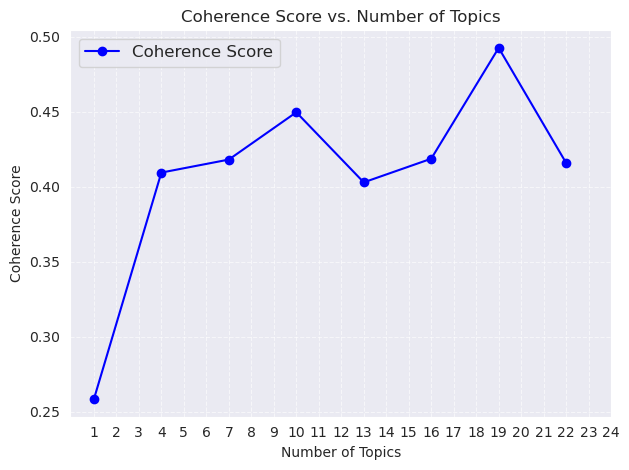

In [15]:
import matplotlib.pyplot as plt
import numpy as np
limit = 25
start = 1
step = 3
x = range(start, limit, step)

plt.plot(x, coherence_values, marker='o', color='b', label='Coherence Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.legend(fontsize=12)
plt.xticks(np.arange(1,25,1))
plt.tight_layout()  
plt.show()

In [ ]:
import matplotlib.pyplot as plt
limit = 25
start = 1
step = 3
x = range(start, limit, step)

plt.plot(x, coherence_values, marker='o', color='b', label='Coherence Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.legend(fontsize=12)
plt.xticks(np.arange(1,25,3))
plt.tight_layout()
plt.show()

In [19]:
import gensim
from tqdm import tqdm
LDA = gensim.models.ldamulticore.LdaMulticore

# Build LDA model
lda_model = LDA(corpus=corpus_matrix_bi,id2word=id2word_bi,
                num_topics=19,
                random_state=256,
                chunksize=100,
                passes=14,
                per_word_topics=True)


In [20]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix_bi))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bigram_bow, dictionary=id2word_bi, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -14.465655086350155

Coherence Score:  0.457328675046584


In [21]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()
# Visualize the topics

# Visualize the topics
# fig, ax = plt.subplots(figsize=(30, 30))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus = corpus_matrix_bi, dictionary = id2word_bi)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.254618  0.234161       1        1  19.571124
0      0.250388 -0.206333       2        1  10.178426
17     0.168738  0.169223       3        1   8.094745
3      0.081645 -0.000357       4        1   7.821429
5      0.172660 -0.234550       5        1   6.702603
1      0.017283 -0.142358       6        1   4.687638
16    -0.015655  0.021405       7        1   4.516437
9      0.023655  0.105215       8        1   4.303170
4     -0.048463  0.099239       9        1   3.908738
6     -0.067082  0.074608      10        1   3.703141
15    -0.056611 -0.015309      11        1   3.386726
14    -0.069531  0.065713      12        1   3.177885
10    -0.109079  0.038321      13        1   2.981593
2     -0.115130 -0.003991      14        1   2.977680
13    -0.083813 -0.005577      15        1   2.939444
8     -0.099865 -0.039516      16        1   2.882652
18    -0.073621 -0.030122      17        1   2.865989
11    -0.101314 -0.065108      18        1   2.784763
7     -0.128823 -0.064665      19        1   2.515818, topic_info=            Term          Freq         Total Category  logprob  loglift
116     निर्वाचन  12942.000000  12942.000000  Default  30.0000  30.0000
22           भोट  17334.000000  17334.000000  Default  29.0000  29.0000
36    उम्मेदवारी   6836.000000   6836.000000  Default  28.0000  28.0000
43         नेपाल   5151.000000   5151.000000  Default  27.0000  27.0000
4          एमाले  14921.000000  14921.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
962        दर्ता    188.912994   1617.173126  Topic19  -4.7409   1.5354
2215     हजार_सय     92.253205    197.316684  Topic19  -5.4576   2.9223
641         शाही     82.444705    136.272186  Topic19  -5.5700   3.1800
49           दिन     91.997459   2557.443928  Topic19  -5.4604   0.3576
353      स्थापित     82.381210    589.272840  Topic19  -5.5708   1.7150

[1044 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
7345      4  0.982495               +
4783     14  0.996297               =
3588      6  0.986784  BL_Breaknlinks
3589      6  0.986784  BLmedia_BLnews
2781     11  0.990521           Balen
...     ...       ...             ...
376      18  0.002201               ४
3261      2  0.973448               –
3261      6  0.024644               –
8455     14  0.994332           –_खबर
8685     15  0.991740               ’

[2019 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 1, 18, 4, 6, 2, 17, 10, 5, 7, 16, 15, 11, 3, 14, 9, 19, 12, 8])

# Overlap between topics , trying other number of topics

## Topics = 16

In [22]:
lda_model2 = LDA(corpus=corpus_matrix_bi,id2word=id2word_bi,
                num_topics=16,
                random_state=256,
                chunksize=100,
                passes=14,
                per_word_topics=True)
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(corpus_matrix_bi))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=bigram_bow, dictionary=id2word_bi, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


Perplexity:  -14.622668756428443

Coherence Score:  0.41667989155082186


In [23]:
vis2 = pyLDAvis.gensim.prepare(lda_model2, corpus = corpus_matrix_bi, dictionary = id2word_bi)
vis2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.312938  0.122085       1        1  20.661404
2     -0.169333 -0.257979       2        1  10.461170
3      0.028708 -0.011961       3        1   7.394142
0     -0.041188 -0.207709       4        1   6.836994
9     -0.108828  0.019591       5        1   6.639995
10    -0.066796  0.147969       6        1   6.151617
4     -0.059305  0.134329       7        1   5.218396
1      0.070669 -0.168062       8        1   5.080548
15     0.075174  0.059268       9        1   4.888233
6     -0.006916  0.097109      10        1   4.631044
5      0.105713 -0.070830      11        1   4.302818
8      0.086058  0.057749      12        1   4.093303
13     0.003005 -0.055990      13        1   3.748884
11     0.112056  0.065285      14        1   3.729705
7      0.146535  0.027883      15        1   3.220429
14     0.137386  0.041263      16        1   2.941319, topic_info=            Term          Freq         Total Category  logprob  loglift
116     निर्वाचन  13637.000000  13637.000000  Default  30.0000  30.0000
22           भोट  18827.000000  18827.000000  Default  29.0000  29.0000
236         मेयर   8185.000000   8185.000000  Default  28.0000  28.0000
36    उम्मेदवारी   7208.000000   7208.000000  Default  27.0000  27.0000
4          एमाले  15608.000000  15608.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
2701       ध्यान    123.373572    184.526787  Topic16  -5.3232   3.1237
503   स्पष्टीकरण    143.183860    274.601339  Topic16  -5.1743   2.8751
5695  शेर_बहादुर    110.992171    209.813942  Topic16  -5.4290   2.8896
6864      यसपालि     95.734893    145.896128  Topic16  -5.5768   3.1050
1155          दि     97.830789    410.907209  Topic16  -5.5552   2.0912

[869 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
7345       3  0.985769               +
4783      13  0.993817               =
3588       8  0.992210  BL_Breaknlinks
3589       8  0.992210  BLmedia_BLnews
12022      5  0.993412  Kathmandu_Pati
...      ...       ...             ...
376        4  0.029838               ४
376       11  0.543255               ४
3261       8  0.997686               –
8455      14  0.989822           –_खबर
1324      15  0.987428               …

[1666 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 3, 4, 1, 10, 11, 5, 2, 16, 7, 6, 9, 14, 12, 8, 15])

## Topics=13

In [25]:
lda_model3 = LDA(corpus=corpus_matrix_bi,id2word=id2word_bi,
                 num_topics=13,
                 random_state=256,
                 chunksize=100,
                 passes=14,
                 per_word_topics=True)
# Compute Perplexity
print('\nPerplexity: ', lda_model3.log_perplexity(corpus_matrix_bi))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda3 = CoherenceModel(model=lda_model3, texts=bigram_bow, dictionary=id2word_bi, coherence='c_v')
coherence_lda3 = coherence_model_lda3.get_coherence()
print('\nCoherence Score: ', coherence_lda3)


Perplexity:  -13.68918360965074

Coherence Score:  0.43095963499295825


In [26]:
vis3 = pyLDAvis.gensim.prepare(lda_model3, corpus = corpus_matrix_bi, dictionary = id2word_bi)
vis3

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.061567  0.324826       1        1  22.467409
2     -0.229601  0.049694       2        1   8.473225
3      0.102902 -0.075532       3        1   7.946512
6      0.115628  0.125827       4        1   7.889355
5     -0.251000 -0.017725       5        1   7.684596
9     -0.138977  0.031503       6        1   7.345236
0     -0.095028 -0.027127       7        1   7.189632
4      0.128267  0.076617       8        1   6.497203
7     -0.074002 -0.099092       9        1   6.006713
10     0.102088  0.021202      10        1   5.980817
11     0.117612 -0.126395      11        1   4.898534
8      0.100920 -0.134455      12        1   3.965679
1      0.059623 -0.149344      13        1   3.655090, topic_info=            Term          Freq         Total Category  logprob  loglift
116     निर्वाचन  13474.000000  13474.000000  Default  30.0000  30.0000
22           भोट  18877.000000  18877.000000  Default  29.0000  29.0000
236         मेयर   8209.000000   8209.000000  Default  28.0000  28.0000
4          एमाले  15763.000000  15763.000000  Default  27.0000  27.0000
36    उम्मेदवारी   7332.000000   7332.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
6120   प्रतिनिधि    143.733768    210.541767  Topic13  -5.3877   2.9273
122      गठबन्धन    395.915050   3230.351540  Topic13  -4.3745   1.2099
2638       योजना    140.231317    213.264263  Topic13  -5.4124   2.8898
5146   गठबन्धनले    157.570798    325.843278  Topic13  -5.2958   2.5825
3041  काँग्रेसको    120.151589    216.123407  Topic13  -5.5669   2.7220

[739 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
4783       6  0.995532               =
2720       9  0.994646        AayoMail
4401       5  0.972984    Election2079
4401       9  0.009446    Election2079
12022      6  0.992326  Kathmandu_Pati
...      ...       ...             ...
376       10  0.004246               ४
3261       6  0.997560               –
8455      13  0.987811           –_खबर
8685       7  0.990122               ’
19162      5  0.989167               •

[1445 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 3, 4, 7, 6, 10, 1, 5, 8, 11, 12, 9, 2])

## Topics=10

In [27]:
lda_model4 = LDA(corpus=corpus_matrix_bi,id2word=id2word_bi,
                 num_topics=10,
                 random_state=256,
                 chunksize=100,
                 passes=14,
                 per_word_topics=True)
# Compute Perplexity
print('\nPerplexity: ', lda_model4.log_perplexity(corpus_matrix_bi))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda4 = CoherenceModel(model=lda_model4, texts=bigram_bow, dictionary=id2word_bi, coherence='c_v')
coherence_lda4 = coherence_model_lda4.get_coherence()
print('\nCoherence Score: ', coherence_lda4)


Perplexity:  -11.243280702014589

Coherence Score:  0.43877296544825617


In [28]:
vis4 = pyLDAvis.gensim.prepare(lda_model4, corpus = corpus_matrix_bi, dictionary = id2word_bi)
vis4

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.242184  0.115578       1        1  17.003799
5     -0.153177  0.254982       2        1  14.311607
3      0.242156  0.022516       3        1  12.763086
4      0.118900 -0.065350       4        1  10.780458
9      0.005607 -0.147321       5        1   9.613355
0     -0.068495  0.182213       6        1   9.299547
2     -0.054031 -0.070443       7        1   7.495611
8     -0.000361 -0.156415       8        1   7.313533
1     -0.154115 -0.058160       9        1   6.016956
7     -0.178668 -0.077601      10        1   5.402048, topic_info=           Term          Freq         Total Category  logprob  loglift
116    निर्वाचन  11649.000000  11649.000000  Default  30.0000  30.0000
22          भोट  15287.000000  15287.000000  Default  29.0000  29.0000
36   उम्मेदवारी   6197.000000   6197.000000  Default  28.0000  28.0000
236        मेयर   6757.000000   6757.000000  Default  27.0000  27.0000
50        देउवा   4685.000000   4685.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
610        पदका    160.285697    490.619848  Topic10  -5.6694   1.7997
449   स्वतन्त्र    206.218236   2138.552305  Topic10  -5.4174   0.5794
217   उम्मेदवार    221.067848   3693.539410  Topic10  -5.3479   0.1025
797     एमालेको    167.731174    872.420324  Topic10  -5.6240   1.2695
55     पालिकामा    132.644224    410.593339  Topic10  -5.8587   1.7885

[613 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
4783       6  0.996094               =
2720      10  0.989700        AayoMail
12022     10  0.991121  Kathmandu_Pati
2187       2  0.108020        Kharibot
2187      10  0.879594        Kharibot
...      ...       ...             ...
376       10  0.135772               ४
3261       6  0.901108               –
3261       9  0.095962               –
8455      10  0.985058           –_खबर
1324      10  0.990214               …

[1161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 4, 5, 10, 1, 3, 9, 2, 8])

## Topics = 7

In [29]:
lda_model5 = LDA(corpus=corpus_matrix_bi,id2word=id2word_bi,
                 num_topics=7,
                 random_state=256,
                 chunksize=100,
                 passes=14,
                 per_word_topics=True)
# Compute Perplexity
print('\nPerplexity: ', lda_model5.log_perplexity(corpus_matrix_bi))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda5 = CoherenceModel(model=lda_model5, texts=bigram_bow, dictionary=id2word_bi, coherence='c_v')
coherence_lda5 = coherence_model_lda5.get_coherence()
print('\nCoherence Score: ', coherence_lda5)
vis4 = pyLDAvis.gensim.prepare(lda_model5, corpus = corpus_matrix_bi, dictionary = id2word_bi)
vis4


Perplexity:  -9.919431632695545

Coherence Score:  0.4244493215350705


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.236892 -0.045290       1        1  27.881843
3      0.088302  0.244934       2        1  17.396705
5     -0.242995 -0.089712       3        1  15.208996
0     -0.056968 -0.079172       4        1  12.343449
4      0.093285 -0.109073       5        1   9.678086
2      0.023919 -0.095456       6        1   9.374970
1     -0.142435  0.173770       7        1   8.115951, topic_info=           Term          Freq         Total Category  logprob  loglift
116    निर्वाचन  10534.000000  10534.000000  Default  30.0000  30.0000
36   उम्मेदवारी   5540.000000   5540.000000  Default  29.0000  29.0000
22          भोट  13525.000000  13525.000000  Default  28.0000  28.0000
236        मेयर   6033.000000   6033.000000  Default  27.0000  27.0000
4         एमाले  11757.000000  11757.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
438   वडाध्यक्ष    171.557764   1424.680416   Topic7  -6.0085   0.3946
374  स्थानीय_तह    173.405892   1644.402234   Topic7  -5.9978   0.2618
122     गठबन्धन    171.856858   2431.555290   Topic7  -6.0067  -0.1383
574  कांग्रेसले    156.631887    703.766706   Topic7  -6.0995   1.0088
218        नेता    159.082510   1588.356920   Topic7  -6.0840   0.2103

[464 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
4783       4  0.979067               =
4783       6  0.013321               =
3588       3  0.989526  BL_Breaknlinks
3589       3  0.989526  BLmedia_BLnews
12022      6  0.992165  Kathmandu_Pati
...      ...       ...             ...
376        5  0.029107               ४
376        6  0.006930               ४
376        7  0.130288               ४
8455       7  0.996168           –_खबर
8685       4  0.989920               ’

[865 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 6, 1, 5, 3, 2])

## Topics = 4, No overlap between the topics

In [30]:
lda_model6 = LDA(corpus=corpus_matrix_bi,id2word=id2word_bi,
                 num_topics=4,
                 random_state=256,
                 chunksize=100,
                 passes=14,
                 per_word_topics=True)
# Compute Perplexity
print('\nPerplexity: ', lda_model6.log_perplexity(corpus_matrix_bi))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda6 = CoherenceModel(model=lda_model6, texts=bigram_bow, dictionary=id2word_bi, coherence='c_v')
coherence_lda6 = coherence_model_lda6.get_coherence()
print('\nCoherence Score: ', coherence_lda6)
vis6 = pyLDAvis.gensim.prepare(lda_model6, corpus = corpus_matrix_bi, dictionary = id2word_bi)
vis6


Perplexity:  -9.581034632148437

Coherence Score:  0.37243810076106076


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.238023 -0.018699       1        1  41.076282
2      0.194453 -0.057684       2        1  21.470230
0      0.008489 -0.153674       3        1  20.294598
1      0.035081  0.230058       4        1  17.158890, topic_info=               Term          Freq         Total Category  logprob  loglift
36       उम्मेदवारी   5565.000000   5565.000000  Default  30.0000  30.0000
22              भोट  12698.000000  12698.000000  Default  29.0000  29.0000
236            मेयर   5797.000000   5797.000000  Default  28.0000  28.0000
116        निर्वाचन  10210.000000  10210.000000  Default  27.0000  27.0000
21           नेपाली   8033.000000   8033.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
815           महिला    335.318195    629.419752   Topic4  -6.0870   1.1329
1127        एमालेले    340.431622    702.510662   Topic4  -6.0719   1.0382
207   प्रधानमन्त्री    420.693038   1629.357876   Topic4  -5.8602   0.4086
54         कांग्रेस    519.384982   4336.522219   Topic4  -5.6494  -0.3595
21           नेपाली    356.629582   8033.436663   Topic4  -6.0254  -1.3520

[293 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4783      3  0.996830         =
2720      1  0.008402  AayoMail
2720      4  0.991384  AayoMail
2187      1  0.008351  Kharibot
2187      4  0.993763  Kharibot
...     ...       ...       ...
526       3  0.117310       हैन
526       4  0.002838       हैन
238       1  0.882575      होला
238       3  0.116811      होला
238       4  0.000519      होला

[464 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

In [32]:
import csv
import pandas as pd
from collections import Counter

def generate_word_csv(lda_model, dictionary, num_words=50):
    # Combine all tokens from the dataset into a single list
    all_tokens = [token for tokens in bigram_bow for token in tokens]

    # Count the occurrences of each word in the full dataset
    word_counts = Counter(all_tokens)

    # Save the word counts to a CSV file
    with open("bigram_word_counts_full_dataset.csv", mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Word', 'Count'])
        writer.writerows(word_counts.items())

    # Generate CSV files for each topic containing word counts
    topics = lda_model.show_topics(num_topics=4, num_words=num_words, formatted=False)

    for topic_id, topic_words in topics:
        topic_words_dict = dict(topic_words)
        topic_words_list = [(word_counts[word],word) for word in topic_words_dict]

        df = pd.DataFrame(topic_words_list,columns=['Word', 'Count'])
        df.sort_values(["Word"], axis=0, ascending=[False],inplace=True)
        df.to_csv(f"bigram_topic_{topic_id+1}.csv",index=False,header=False)

generate_word_csv(lda_model6,id2word_bi, num_words=50)